In [63]:
# библиотеки для анализа данных
import numpy as np
import pandas as pd

# Полезные материалы

* лекции https://vk.com/id95510093
* https://mipt.lectoriy.ru/course/LinearAlgebra

# Линейная алгебра

Кратко рассмотрим подмножество базовой линейной алгебры, которое потребуется для машинного обучения. Ниже представлены основные математические операции, арифметика и операции, выраженные через математические обозначения и соответствующую реализацию в коде.

## Скаляры

Формально мы называем значения, состоящие только из одной числовой величины, скалярами. Если вы хотите, например, преобразовывать градусы Цельсия в градусы по Фаренгейту, нужно использовать выражение $c = \frac{5}{9}(f-32)$, где f - градусы Фаренгейта. В этом уравнении каждое из слагаемых - $5, 9, 32$ - являются скалярными значениями. Компоненты $c$ и $f$ называются переменными и представляют неизвестные скалярные значения. 

В этой серии ноутбуков (статей) обозначим скалярные переменные строчными буквами (например, $x, y, z$). Пространство всех (непрерывных) вещественных скаляров через ${\rm I\!R}$. Далее будут использованы строгие определения того, что именно является пространством, но пока помните, что выражение $x \in {\rm I\!R}$ является формальным способом сказать, что $x$ является вещественным скаляром. Символ $\in$ может быть объявлен как «в» и просто обозначает членство в множестве. Аналогично, можно написать $x, y \in {0,1}$, где $x, y$ являются числами, значение которых может быть только $0$ или $1$. 

В коде скаляр представлен numpy ndarray только с одним элементом. В следующем фрагменте мы создаем два скаляра и выполняем с ними некоторые знакомые арифметические операции, а именно сложение, умножение, деление и возведение в степень.

In [29]:
import numpy as np

x = np.array(2.0)
y = np.array(3.0)

# набор базовых математических операций со скалярами
x + y, x * y, x / y, x ** y

(5.0, 6.0, 0.6666666666666666, 8.0)

## Вектора и операции с ними

В программных реализациях можно думать о векторе как о наборе (списке) скалярных значений. Мы называем эти значения элементами (сущности или компонентами) вектора. Когда наши векторы представляют примеры из какого-либо набора данных, их значения принимают некоторое значения реального мира. Например, если обучать модель прогнозировать риск просрочки по кредиту, можно было бы связать каждого кандидата с вектором, компоненты которого соответствуют их доходу, стажу работы, количеству предыдущих просрочек и других факторов. Если изучать, например, риск сердечных приступов, с которыми могут столкнуться пациенты, можно было бы представлять каждого пациента вектором, компоненты которого отражают их самые последние показатели жизнедеятельности, уровни холестерина, минуты упражнений в день и т.д. В математической записи вектора обозначаются в виде выделенных букв (в нижнем регистре) (например, $\bf{x, y, z}$) или $\vec{x}, \vec{y}, \vec{z}$. 

В numpy мы работаем с векторами через 1-мерные numpy ndarrays. В общем случае ndarrays может иметь произвольную длину в зависимости от ограничений памяти вашей машины.

In [30]:
# вектор из 4 элеметров
x = np.arange(4)
x

array([0, 1, 2, 3])

Мы можем ссылаться на любой элемент вектора, используя индекс. Например, мы можем сослаться на i-й элемент $\vec{x}$ с помощью $x_i$. Обширная литература рассматривает векторы столбцов как стандартную ориентацию векторов (как и эта серия статей). В математике вектор $x$ можно записать как:

$$\begin{align}
    \vec{x} &= \begin{bmatrix}
           x_{1} \\
           x_{2} \\
           \vdots \\
           x_{n}
         \end{bmatrix}
  \end{align}$$

где $x_1, \dots, xn$ - элементы вектора. В коде обращение к элементам вектора происходит посредством индексации numpy array (индексы начинаются с 0)

In [64]:
x[3]

3

Нам нужно обсудить две общие геометрические интерпретации векторов, как точек или направлений в пространстве. По сути, вектор - это список чисел, такой как список Python ниже.

In [65]:
v = [1, 7, 0, 1]

Математики чаще всего пишут это как вектор столбца или строки, то есть как

$$
\mathbf{x} = \begin{bmatrix}1\\7\\0\\1\end{bmatrix},
$$

или

$$
\mathbf{x}^\top = \begin{bmatrix}1 & 7 & 0 & 1\end{bmatrix}.
$$ 

Они часто имеют различные интерпретации, где точки данных являются векторами столбцов, а веса, используемые для формирования взвешенных сумм, являются векторами строк. Тем не менее, может быть полезно быть гибким - матрицы являются полезными структурами данных: они позволяют нам организовывать данные, которые имеют различные способы изменения. Например, строки в нашей матрице могут соответствовать различным домам (точкам данных), в то время как столбцы могут соответствовать различным атрибутам. Таким образом, хотя ориентацией по умолчанию для одного вектора является вектор столбца, в матрице, представляющей набор табличных данных, более обычным является обработка каждой точки данных как вектора строки в матрице. И, как мы увидим далее, эта конвенция позволит применять общие методы глубокого обучения. Например, вдоль самой внешней оси ndarray мы можем получить доступ или перечислить мини-пакеты точек данных или просто точки данных, если мини-пакет не существует.

Учитывая вектор, первая интерпретация, которую мы должны дать, это как точка в пространстве. В двух или трех измерениях мы можем визуализировать эти точки, используя компоненты векторов для определения местоположения точек в пространстве по сравнению с фиксированной ссылкой, называемой началом координат.

![img](https://github.com/ddvika/Data-Science-School-2020/blob/main/lecture_7/imgs/235-3D-vector.png?raw=true)

Иллюстрация визуализации векторов в виде точек на плоскости. Первый компонент вектора дает координату x, второй компонент дает координату y, третий - z. Более высокие измерения аналогичны, хотя гораздо сложнее визуализировать



## Длина, размерность и форма

Вектор - это просто массив чисел. И как у каждого массива есть длина, так и у каждого вектора. В математических обозначениях, если мы хотим сказать, что вектор $\vec{x}$ состоит из $n$ вещественных скаляров, мы можем выразить это как $\vec{x} \in \mathbb{R}^n$. Длина вектора обычно называется размерностью вектора. Как и в случае обычного массива Python, мы можем получить доступ к длине ndarray, вызвав встроенную в Python функцию len ().

In [66]:
len(x)

4

Когда `ndarray` представляет вектор (с точно одной осью), мы также можем получить доступ к его длине через `.shape`. Shape (форма) - это Кортеж, который перечисляет длину (размерность)
вдоль каждой оси `ndarray". Для `ndarray` с только одной осью, форма имеет только один элемент.

In [67]:
x.shape

(4,)

Обратите внимание, что слово "измерение" имеет тенденцию перегружаться в этих контекстах, и это приводит к путанице. Для уточнения мы используем размерность вектора или оси для обозначения его длины, т.е. число элементов вектора или оси. Однако мы используем размерность `ndarray` для обозначения количества осей, которые имеет `ndarray`. В этом смысле размерность некоторой оси `ndarray` будет равна длине этой оси.

## Линейное пространство. Операции над векторами

_Линейным (векторным) пространством_ $\mathit{V}$ над некоторым полем $K$ называется множество элементов, называемых векторами, с заданными на нем операциями

- сложения: $V \times V \rightarrow V$ (любым двум элементам $u$ и $v$ множества $V$ ставится в соответствие третий элемент $w$ этого же множества, называемый _суммой_ элементов $u$ и $v$ и обозначаемый $w=u+v$);

- умножения на число: $K \times V \rightarrow V$ (любому элементу $u$ множества $V$ и любому вещественному числу $\lambda$ ставится в соответствие элемент $x$ этого же множества, называемый _произведением элемента $u$ на число_ $\lambda$ и обозначаемый $x=\lambda u$ или $x=u\lambda$).

В качестве поля, над которым задается векторное пространство, обычно выбирают множество вещественных чисел $\mathbb{R}$ или комплексных чисел $\mathbb{C}$. Элементы такого поля иногда называют _скалярами_.

Операция сложения векторов должна удовлетворять следующим условиям:<br>
1) коммутативность: $u+v=v+u$;<br>
2) ассоциативность: $(u+v)+w=u+(v+w)$;<br>
3) существование такого элемента $0\in V$, что $u+0=u$ для любого $u$;<br>
4) существование для любого $u\in V$ такого вектора $-u\in V$, что $u+(-u)=0$.

Операция умножения вектора на скаляр должна подчиняться следующим условиям:<br>
1) $1\cdot u=u$ для любого $u\in V$;<br>
2) ассоциативность операции умножения на скаляр: $\lambda (\mu \cdot u)=(\lambda \cdot \mu) u$;<br>
3) дистрибутивность относительно сложения векторов: $\lambda(u+v)=\lambda u+\lambda v$;<br>
4) дистрибутивность относительно сложения скаляров: $(\lambda+\mu)u=\lambda u+\mu u$.

Элемент $0$ называется _нулевым вектором_, элемент $-u$ называется _противоположным вектором_ к $u$.

### Примеры

__1.__ Самым известным примером линейного пространства является множество всех свободных векторов на плоскости. В аналитической геометрии операция сложения двух таких векторов $u+v$ определена по «правилу параллелограмма», а умножению вектора $u$ на число $\lambda$ соответствует вектор $\lambda u$, имеющий в $|\lambda|$ раз большую длину по сравнению с исходным вектором $u$ и то же направление, если $\lambda > 0$, и противоположное, если $\lambda < 0$.

Соответствие этих операций условиям для линейного пространства проверяется элементарно. Таким образом, это множество является линейным пространством. Аналогично множества векторов на прямой и в пространстве также будут являться линейными пространствами.

__2.__ Рассмотрим в качестве примера теперь множество точек на координатной плоскости. Возьмем точку $a$, которой соответствуют координаты $(a_{1},a_{2})$, и точку $b$, которой соответствуют координаты $(b_{1},b_{2})$. Зададим в этом пространстве операцию сложения как покоординатную сумму двух элементов:

$$a+b = (a_{1}+b_{1}, a_{2}+b_{2}) = с$$

и операцию умножения элемента на число как умножение каждой его координаты на это число:

$$\lambda a=\lambda(a_{1},a_{2})=(\lambda a_{1}, \lambda a_{2}).$$

Такое пространство над полем вещественных чисел с заданными операциями сложения и умножения на число будет соответствовать условиям векторного пространства и обычно обозначается $\mathbb{R}^{2}$.

В общем виде это можно представить как пространство $\mathbb{R}^{n}$ — множество упорядоченных последовательностей длины $n$ элементов поля $\mathbb{R}$. Сложение и умножение на число элементов его определяются покомпонентно: 
 
 $$(a_{1},a_{2}, ... ,a_{n})+(b_{1}, b_{2},...,b_{n})=(a_{1}+b_{1}, a_{2}+b_{2}, ..., a_{n}+b_{n}), \\
\lambda(a_{1},a_{2},...,a_{n})=(\lambda a_{1}, \lambda a_{2},...,\lambda a_{n}).$$
 
 
Получившееся линейное пространство называют _n-мерным координатным пространством_.

**3.**
Рассмотри полином степени $\leq n$ . 
Полином $ x^3 - 2x^2 + 1$ можно рассматривать как вектор $\begin{bmatrix}1 \\ -2 \\ 0 \\ 1\end{bmatrix}$ с базисом $\{x^3, x^2, x, 1\}$

__4.__ Примером линейного пространства может служить множество $\left \{P_{n}(t)\right \}$ всех алгебраических многочленов степени не выше $n$ с операциями сложения и умножения на вещественные числа, определенными по обычным правилам математического анализа.

## Линейная зависимость

__Определение__

Основным понятием линейной алгебры является _линейная зависимость (независимость)_ векторов.
Векторы $u_{1},u_{2}, ...,u_{n}$ являются _линейно зависимыми_, если найдутся такие числа $\lambda_{1}, \lambda_{2}, ..., \lambda_{n}$, что хотя бы одно из них отлично от нуля и 
 
 
$$\lambda_{1}u_{1}+\lambda_{2}u_{2}+...+\lambda_{n}u_{n}=0.$$

Выражение $\sum_{t=1}^{n}\lambda_{t}u_{t}$ называется _линейной комбинацией_ элементов $u_{1},u_{2},...,u_{n}$ пространства $V$.

Элементы $u_{1},u_{2},...,u_{n}$ векторного пространства $V$ называются _линейно независимыми_, если равенство $\sum_{t=1}^{n}\lambda_{t}u_{t}=0$ выполняется только тогда, когда $\lambda_{1}= \lambda_{2}= ...= \lambda_{n}=0$.

__Если для данной системы ненулевых векторов существует нетривиальная (если хотя бы один из коэффициентов отличен от нуля) линейная комбинация, то каждый из этих векторов может быть выражен через линейную комбинацию остальных.__

Справедливо и обратное утверждение: __для того, чтобы некоторое множество элементов линейного пространства было линейно зависимым, необходимо и достаточно, чтобы один из этих элементов являлся линейной комбинацией остальных.__

Справедливы два элементарных утверждения:

1. _Если среди элементов $a_{1}, a_{2},...,a_{n}$ есть нулевой элемент, то эти элементы линейно зависимы._

В самом деле, если, например, $a_{1} =0$, то линейная комбинация элементов будет равняться нулю при $\lambda_{1}=1, \lambda_{2}= ...= \lambda_{n}=0$.

2. _Если некоторое подмножество множества $a_{1}, a_{2},...,a_{n}$ линейно зависимо, то и все элементы $a_{1}, a_{2},...,a_{n}$ линейно зависимы_.

В самом деле, допустим, что линейно зависимое подмножество состоит из первых $k<n$ элементов множества. Тогда существуют не равные нулю одновременно числа $\lambda_{1}, \lambda_{2},...,\lambda_{k}$, такие, что 

$$\sum_{i=1}^{k}\lambda_{i}a_{i}=0.$$

Это равенство также можно записать в виде $$\sum_{i=1}^{k}\lambda_{i}a_{i}+\sum_{i=k+1}^{n} 0 a_{i}=0,$$
что говорит о линейной зависимости векторов $a_{1}, a_{2},...,a_{n}$. Что и требовалось доказать.

Вернемся к примеру с векторами на плоскости. В этом случае любые два ненулевых и неколлинеарных (не параллельных и не лежащих на одной прямой) вектора будут линейно независимы, так как нельзя выразить один через другой, а уже любые три вектора будут линейно зависимы — каждый из них можно будет выразить через линейную комбинацию двух других.


## Базис и размерность

__Определение__

Совокупность $n$ линейно независимых векторов линейного пространства $V$ будет называться _базисом_ этого пространства, если для каждого элемента $u$ пространства $V$ найдутся такие вещественные числа $\xi_{1},\xi_{2},. . . , \xi_{n}$, что справедливо равенство

$$u = \xi_{1}e_{1} + \xi_{2}e_{2} + . . . + \xi_{n}e_{n}.$$

Коэффициенты $\xi_{i}$ в этом выражении называются _координатами_ вектора $u$ в базисе $e_{1} , . . . , e_{n}$, а само такое представление вектора $u$ называется _разложением этого вектора по базису_.


![img](https://github.com/ddvika/Data-Science-School-2020/blob/main/lecture_7/imgs/basis.png?raw=true)

Сверху изображен базис на плоскости. Базисные векторы изображены голубым и оранжевым цветом, зелёный вектор может быть представлен в виде суммы базисных векторов, умноженных на некоторые коэффициенты (зелёный = −2 голубой + 1 оранжевый), называемой линейной комбинацией и, таким образом, линейно зависим от них, как и любой другой вектор этого пространства (плоскости), каждый из которых тоже может быть представлен в виде линейной комбинации голубого и оранжевого с какими-то коэффициентами.

__Для каждого элемента линейного пространства $V$ существует единственное представление в виде линейной комбинации базисных элементов.__

__Доказательство__

Пусть в линейном пространстве $V$ заданы базис ${e_{1}, e_{2}, ..., e_{n}}$ и произвольный элемент $u$. Тогда, по определению базиса, система элементов ${e_{1}, e_{2}, ..., e_{n}, u}$ линейно зависима, а значит, из свойств линейно зависимых векторов известно, что $u$ можно представить в виде линейной комбинации элементов $e_{1},e_{2}, ..., e_{n}$. _Существование_ разложения, таким образом, доказано.

Покажем теперь _единственность_ разложения. Допустим, что существуют две различные линейные комбинации $$u=\sum_{i=1}^{n}\xi_{i}e_{i}$$ и $$u=\sum_{i=1}^{n}\eta_{i}e_{i}.$$

Тогда получаем, что $$\sum_{i=1}^{n}(\xi_{i}-\eta_{i})e_{i}=0,$$
а так как векторы $e_{1}, e_{2}, ..., e_{n}$ линейно независимы, такое равенство будет выполняться только при всех коэффициентах равных нулю, то есть при $\xi_{i}=\eta_{i}$.

__Определение__

Линейное пространство $V$ называется _$n$-мерным_, если в нем существует $n$ линейно независимых векторов, а любой набор из большего количества векторов оказывается линейно зависимым. При этом число $n$ называется _размерностью_ этого линейного пространства и обозначается $dim V$.

__Определение__

Линейное пространство $V$ называется _бесконечномерным_, если в нем существует любое число линейно независимых элементов.

Базис линейного пространства $\mathbb{R}^{n}$, состоящий из векторов $e_{1}=(1,0,...,0), \; e_{2}=(0,1,...,0), ...,e_{n}=(0,0,...,1)$, называется _стандартным базисом_ этого пространства.

__Теорема__

Если $V$ — линейное пространство размерности $n$, то любые $n$ линейно независимых элементов этого пространства образуют его базис.

__Доказательство__

Пусть $e_{1}, e_{2},...,e_{n}$ — любая система $n$ линейно независимых векторов пространства $V$ (существование хотя бы одной такой системы вытекает из определения $n$-мерного линейного пространства).

Если $u$ — любой элемент пространства $V$, тогда из того же определения следует, что система $(n+1)$ элементов $u, e_{1}, e_{2},...,e_{n}$ линейно зависима, то есть найдутся не все равные нулю вещественные числа $\alpha_{0},\alpha_{1},\alpha_{2},...,\alpha_{n}$, такие, что 

$$\alpha_{0}u+\alpha_{1}e_{1}+\alpha_{2}e_{2}+...+\alpha_{n}e_{n}=0.$$

$\alpha_{0}$ отлично от нуля (иначе из предыдущего равенства вытекала бы линейная зависимость векторов $e_{1}, e_{2},...,e_{n}$). 

Поделив равенство на $\alpha_{0}$ и положив $\xi_{1}=-\frac{\alpha_{1}}{\alpha_{0}},\xi_{2}=-\frac{\alpha_{2}}{\alpha_{0}},...,\xi_{n}=-\frac{\alpha_{n}}{\alpha_{0}}$, получим

$$u = \xi_{1}e_{1} + \xi_{2}e_{2} + . . . + \xi_{n}e_{n}.$$

Так как $u$ — произвольный элемент пространства $V$, последнее равенство доказывает, что система векторов $e_{1}, e_{2},...,e_{n}$ является базисом пространства $V$.

## Работа с векторами в Python

__Доказательство__

Массив `list` — итерируемый объект, из которого можно создать вектор (например, список). Параметр `dtype` задает тип данных для значений вектора, например, `int` для целочисленных значений и `float` — для вещественных. Если этот параметр не задан, то тип данных будет определен из типа элементов объекта, заданного в первом аргументе.

В NumPy вектор является одномерным массивом.

In [68]:
import numpy as np

In [69]:
a = np.array([1, 2, 3])
print(f'Вектор:\n{a}')

Вектор:
[1 2 3]


In [70]:
b = np.array([1, 2, 3, 4, 5], dtype=float)
print(f'Вектор с вещественными значениями:\n{b}')

Вектор с вещественными значениями:
[1. 2. 3. 4. 5.]


In [71]:
c = np.array([True, False, False], dtype=bool)
print(f'Вектор с булевыми значениями:\n{c}')

Вектор с булевыми значениями:
[ True False False]


Тип значений вектора можно узнать с помощью атрибута vec.dtype, где vec — объект вектора.

In [72]:
print(f'Тип булевого вектора:\n{c.dtype}')

Тип булевого вектора:
bool


Другим способом задания вектора является функция `numpy.arange([start, ]stop, [step, ]...)`, которая задает последовательность чисел заданного типа из промежутка [`start`, `stop`) (последнее значение не включается) через шаг `step`:


In [24]:
d = np.arange(start=0, stop=1, step=0.2) # последнее значение не включается!
print(f'Вектор вещественных чисел от 0 до 1 с шагом 0.2:\n{d}')

Вектор вещественных чисел от 0 до 1 с шагом 0.2:
[0.  0.2 0.4 0.6 0.8]


С помощью NumPy можно совершать различные векторные операции, в том числе складывать векторы, умножать вектор на число и другой вектор (покоординатно).

In [26]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
k = 2

print(f'Вектор a: {a}')
print(f'Вектор b: {b}')
print(f'Число k: {k}')

Вектор a: [1 2 3]
Вектор b: [4 5 6]
Число k: 2


In [28]:
print(f'Вектор a - b: {a - b}')

Вектор a - b: [-3 -3 -3]


In [27]:
print(f'Покоординатное умножение векторов a и b: {a * b}')

Покоординатное умножение векторов a и b: [ 4 10 18]


Проверим линейную зависимость векторов

In [73]:
import numpy as np

matrix = np.array(
    [
        [0, 1 ],
        [1, 0]
    ])

lambdas, V =  np.linalg.eig(matrix.T)
# The linearly dependent row vectors 
print(lambdas)
print(matrix[lambdas == 0,:])

[ 1. -1.]
[]


Если собственное значение матрицы равно нулю, соответствующий ему собственный вектор линейно зависит.

**Определение:** ненулевой вектор , который при умножении на некоторую квадратную матрицу  превращается в самого же себя с числовым коэффициентом , называется собственным вектором матрицы . Число  называют собственным значением или собственным числом данной матрицы. 

![img](https://github.com/ddvika/Data-Science-School-2020/blob/main/lecture_7/imgs//Mona_Lisa_eigenvector_grid.png?raw=true)

В Википедии есть удачный геометрический [пример](https://ru.wikipedia.org/wiki/Собственный_вектор) (взгляните!), иллюстрирующий рассматриваемые понятия – на репродукции Джоконды синий вектор не меняется в результате перекоса плоскости, а значит, является собственным вектором данного линейного преобразования с коэффициентом . 


In [47]:
import numpy as np

matrix = np.array(
    [
        [0, 1 ,0 ,0],
        [0, 0, 1, 0],
        [0, 1, 1, 0],
        [1, 0, 0, 1]
    ])

lambdas, V =  np.linalg.eig(matrix.T)
# The linearly dependent row vectors 
print(lambdas)
print(matrix[lambdas == 0,:])

[ 1.61803399 -0.61803399  0.          1.        ]
[[0 1 1 0]]


## Примеры задач

**ОТКРОЕМ НОУТБУК "practice_linear_combinations_raw.ipynb"**

__1.__ Известно, что векторы некоторого линейного пространства $x$, $y$ и $z$ линейно независимы. Будут ли линейно независимы слеудующие векторы: $x-y, y-z, z-x?$

__Решение__




__2.__ Известно, что векторы некоторого линейного пространства $x$, $y$ и $z$ линейно независимы. Будут ли линейно независимы слеудующие векторы: $x, x+y, x+y+z?$

__Решение__


__3.__ Исследовать на линейную зависимость:
$$f_{1}(x)=x^{2}+5, f_{2}(x)=x^{2}, f_{3}(x)=1.$$

__Решение__


## Cкалярное произведение

До сих пор мы выполняли только элементарные операции. И если бы это было все, что мы могли сделать, линейная алгебра, вероятно, не заслуживала бы своего собственного раздела. Однако одной из самых фундаментальных операций является скалярное произведение. Учитывая два вектора $\mathbf{x}, \mathbf{y} \in \mathbb{R}^d$, их *скалярное произведение* $\mathbf{x}^\top \mathbf{y}$ (или $\langle \mathbf{x}, \mathbf{y} \rangle$) является суммой над произведениями элементов в одной и той же позиции: $\mathbf{x}^\top \mathbf{y} = \sum_{i=1}^{d} x_i y_i$.

In [74]:
x

array([0, 1, 2, 3])

In [76]:
y = np.ones(4)
y

array([1., 1., 1., 1.])

In [48]:
y = np.ones(4)
x, y, np.dot(x, y)

(array([0, 1, 2, 3]), array([1., 1., 1., 1.]), 6.0)

Заметим, что мы можем выразить скалярное произведение двух векторо, выполнив элементарное умножение, а затем сумму:

In [77]:
x * y

array([0., 1., 2., 3.])

In [49]:
np.sum(x * y)

6.0

Скалярное произведение полезно в широком диапазоне контекстов. Например, задается некоторый набор значений, который обозначается вектором $\mathbf{x} \in \mathbb{R}^d$ и набором весов, обозначаемых $\mathbf{w} \in \mathbb{R}^d$, взвешенная сумма значений в $\mathbf{x}$ в соответствии с весами $\mathbf{w}$ может быть выражено как скалярное произведение $\mathbf{x}^\top \mathbf{w}$. Когда веса неотрицательны и сумма = единице (т. е. $\left(\sum_{i=1}^{d} {w_i} = 1\right)$),
скалярное произведение выражает *средневзвешенное значение*. После нормализации два вектора должны иметь единичную длину, скалярное произведение выражают косинус угла между ними.

С помощью скалярного произведения можно задать евклидову норму вектора: $ \| x \|_2 = \sqrt{x_1^2 + ... + x_n^2} = \sqrt{x^{\top} x} = \sqrt{\langle x, x \rangle} $

Скалярное произведение также допускает геометрическую интерпретацию: оно тесно связано с углом между двумя векторами


Для начала рассмотрим два конкретных вектора:

$$
\vec{v} = (r,0) \; \text{and} \; \vec{w} = (s\cos(\theta), s \sin(\theta)).
$$

Вектор $\vec{v}$ имеет длину $r$ и проходит параллельно оси $x$, а вектор $\vec{w}$ имеет длину $s$ и угол $\theta$ с осью $x$.
Если мы вычислим скалярное произведение этих двух векторов, мы увидим, что

$$
\theta = \arccos\left(\frac{\vec{v}\cdot\vec{w}}{\|\vec{v}\|\|\vec{w}\|}\right).
$$

Для этих двух конкретных векторов скалярное произведение в сочетании с нормами (опишем далее) говорит нам о угле между этими двумя векторами. Этот же факт в целом правдив. Мы не будем выводить здесь выражение, однако, если мы рассмотрим запись $\|\vec{v} - \vec{w}\|^2$ двумя способами: один со скалярным произведением, а другой геометрически с использованием закона косинусов, мы можем получить полное соотношение. 

Действительно, для любых двух векторов $\vec{v}$ и $\vec{w}$ угол между двумя векторами равен:

$$\theta = \arccos\left(\frac{\vec{v}\cdot\vec{w}}{\|\vec{v}\|\|\vec{w}\|}\right).$$

Это хороший результат, так как ничто в вычислениях не ссылается на двухмерность. Действительно, мы можем использовать это в трех или трех миллионах измерений без проблем.

In [ ]:
def angle(v, w):
    return np.arccos(v.dot(w) / (np.linalg.norm(v) * np.linalg.norm(w)))

angle(np.array([0, 1, 2]), np.array([2, 3, 4]))

0.4189900840328574

Мы не будем использовать его прямо сейчас, но полезно знать, что мы будем ссылаться на векторы, для которых угол равен $\pi/2$ (или эквивалентно $90^{\circ}$), как на ортогональные. Изучив вышеприведенное уравнение, мы увидим, что это происходит, когда $\theta = \pi/2$, что то же самое, что $\cos(\theta) = 0$. Это может произойти только в том случае, если само произведение точек равно нулю, а два вектора ортогональны тогда и только тогда, когда $\vec{v}\cdot\vec{w} = 0$. Это окажется полезной формулой при геометрическом понимании объектов.

Резонно спросить: почему вычисление угла полезно? Ответ приходит в виде неизменности, которую мы ожидаем получить от данных. Рассмотрим изображение и дублированное изображение, где значение каждого пикселя одинаково, но яркость составляет 10%. Значения отдельных пикселей обычно далеки от исходных значений. Таким образом, если вычислить расстояние между исходным изображением и более темным, расстояние может быть большим.

Тем не менее, для большинства приложений МЛ содержание одинаково - это все еще изображение кошки в том, что касается классификатора кошка / собака. Однако, если мы рассмотрим угол, нетрудно видеть, что для любого вектора $\vec{v}$ угол между $\vec{v}$ и $0.1\vec{v}$ равен нулю. Это соответствует тому, что векторы масштабирования сохраняют одно и то же направление и просто изменяют длину. Угол считает более темное изображение идентичным.

Подобные примеры есть везде. В тексте мы можем захотеть, чтобы обсуждаемая тема не изменилась, если мы напишем вдвое больше текста, в котором говорится то же самое. Для некоторого кодирования (такого как подсчет количества вхождений слов в некотором словаре) это соответствует удвоению вектора, кодирующего документ, поэтому мы снова можем использовать угол.

## Произведение матрицы и вектора

Умножение матрицы на вектор производится по правилу «строка на столбец». При умножении матрицы на вектор-столбец число столбцов в матрице должно совпадать с числом строк в векторе-столбце. Результатом умножения матрицы на вектор-столбец есть вектор-столбец:

$$
A \cdot B=\left(\begin{array}{cccc}
a_{11} & a_{12} & \ldots & a_{1 n} \\
a_{21} & a_{22} & \ldots & a_{2 n} \\
\ldots & \ldots & \ldots & \ldots \\
a_{m 1} & a_{m 2} & \ldots & a_{m n}
\end{array}\right) \cdot\left(\begin{array}{c}
b_{1} \\
b_{2} \\
\ldots \\
b_{1 n}
\end{array}\right)=\left(\begin{array}{c}
a_{11} \cdot b_{1}+a_{12} \cdot b_{2}+\ldots+a_{1 n} \cdot b_{n} \\
a_{21} \cdot b_{1}+a_{22} \cdot b_{2}+\ldots+a_{2 n} \cdot b_{n} \\
\ldots \\
a_{m 1} \cdot b_{1}+a_{m 2} \cdot b_{2}+\ldots+a_{m n} \cdot b_{n}
\end{array}\right)=\left(\begin{array}{c}
c_{1} \\
c_{2} \\
\ldots \\
c_{1 m}
\end{array}\right)
$$


При умножении матрицы на вектор-строку, умножаемая матрица может быть только вектором-столбцом, причем количество строк в векторе-столбце должно совпадать с количеством столбцов в векторе-строке. Результатом такого умножения будет квадратная матрица соответствующей размерности:

$$
A \cdot B=\left(\begin{array}{c}
a_{1} \\
a_{2} \\
\cdots \\
a_{n}
\end{array}\right) \cdot\left(\begin{array}{llll}
b_{1} & b_{2} & \ldots & b_{n}
\end{array}\right)=\left(\begin{array}{cccc}
a_{1} \cdot b_{1} & a_{1} \cdot b_{2} & \ldots & a_{1} \cdot b_{n} \\
a_{2} \cdot b_{1} & a_{2} \cdot b_{2} & \ldots & a_{2} \cdot b_{n} \\
\ldots & \ldots & \ldots & \ldots & \ldots & \ldots \\
a_{n} \cdot b_{1} & a_{n} \cdot b_{2} & \ldots & a_{n} \cdot b_{n}
\end{array}\right)=\left(\begin{array}{cccc}
c_{11} & c_{12} & \ldots & c_{1 n} \\
c_{21} & c_{22} & \ldots & c_{2 n} \\
\ldots & \ldots & \ldots & \ldots \\
c_{n 1} & c_{n 2} & \ldots & c_{n n}
\end{array}\right)
$$

In [78]:
X = np.arange(9).reshape(3, 3)
X

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [79]:
y = np.arange(3)
y

array([0, 1, 2])

In [82]:
X@y

array([ 5, 14, 23])

## Нормы

Одни из наиболее полезных операторов в линейной алгебре - это *нормы*.
Неоформально норма вектора говорит нам о длине вектора. Здесь рассматривается понятие "длины", говоря не о размерности, а скорее о величине составляющих.

В линейной алгебре:
**векторная норма** - это функция $f$, отображающая вектор к скаляру, удовлетворяющему набору свойств. 

Когда задается любой вектор $\mathbf{x}$, первое свойство гласит:

если мы масштабируем все элементы вектора по постоянному фактору $\alpha$, его норма также масштабируется на *абсолютное значение* одного и того же постоянного фактора:

$$1) f(\alpha \mathbf{x}) = |\alpha| f(\mathbf{x}).$$


Второе свойство - неравенство треугольника:

$$2) f(\mathbf{x} + \mathbf{y}) \leq f(\mathbf{x}) + f(\mathbf{y}).$$

Третье свойство просто говорит о том, что норма должна быть неотрицательной:

$$ 3)f(\mathbf{x}) \geq 0.$$

Это имеет смысл, поскольку в наименьший *размер* для чего-либо равен 0.
Конечное свойство требует, чтобы наименьшая норма была достигнута и только достигнута вектором, состоящим из всех нулей.

$$\forall i, [\mathbf{x}]_i = 0 \Leftrightarrow f(\mathbf{x})=0.$$

Вы можете заметить, что нормы звучат очень похоже на меры расстояния.
А если вспомнить евклидово расстояние (теорема Пифагора) из начальной школы,
тогда понятия неотрицательности и неравенства треугольника могли прозвучать знакомо.

На самом деле евклидово расстояние - это норма:
в частности, это норма $\ell_2$.

Предположим, что элементы в $n$ - мерном векторе $\mathbf{x}$ - это $x_1, \ldots, x_n$. $\ell_2$ *норма* из $\mathbf{х}$ - это квадратный корень из суммы квадратов элементов вектора:

$$\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n x_i^2},$$

где индекс $2$ часто опускается в нормах $\ell_2$, т. е. $\|\mathbf{x}\| $ эквивалентен $\|\mathbf{x}\|_2 $. В коде мы можем вычислить норму$ \ell_2 $ вектора, вызвав `linalg.norm`.


In [83]:
u = np.array([3, -4])
np.linalg.norm(u)

5.0

В области глубокого обучения мы работаем чаще с квадратной нормой $\ell_2$.

Вы также часто будете сталкиваться с нормой $\ell_1$ *, которая выражается как сумма абсолютных значений элементов вектора:

$$\|\mathbf{x}\|_1 = \sum_{i=1}^n \left|x_i \right|.$$

По сравнению с нормой $\ell_2$ , она меньше подвержена влиянию выбросов. Чтобы вычислить норму $\ell_1$, мы вызовем функцию модуля с суммой по элементам.


In [84]:
np.abs(u).sum()

7

Норма Чебышева определяется максимальным элементом: 

$$ \Vert \mathbf{x} \Vert_{\infty} = \max_i | x_i| $$

ЗАДАНИЕ: Вычислить норму Чебышева у следующего вектора:

In [86]:
s = np.random.uniform(0,2,10)
s

array([1.12963052, 0.29968016, 1.90015823, 1.55227568, 1.11917933,
       1.32411657, 0.20266323, 0.82078106, 1.32302072, 1.07849972])

In [87]:
max(np.abs(s))

1.9001582294574288

И норма $\ell_2$, и норма Чебышева и норма $\ell_1$ являются частными случаями более общей нормы $\ell_p$ **:

$$\|\mathbf{x}\|_p = \left(\sum_{i=1}^n \left|x_i \right|^p \right)^{1/p}.$$


In [88]:
import jax.numpy as jnp
import jax

In [61]:
n = 100
a = jnp.ones(n)
b = a + 1e-3 * jax.random.normal(jax.random.PRNGKey(0), (n,))
print('Relative error in L1 norm:', jnp.linalg.norm(a - b, 1) / jnp.linalg.norm(b, 1))
print('Relative error in L2 norm:', jnp.linalg.norm(a - b) / jnp.linalg.norm(b))
print('Relative error in Chebyshev norm:', jnp.linalg.norm(a - b, jnp.inf) / jnp.linalg.norm(b, jnp.inf))

Relative error in L1 norm: 0.00074820453
Relative error in L2 norm: 0.00094420975
Relative error in Chebyshev norm: 0.0023571588


### Единичный круг в разных нормах

Text(0.5, 1.0, 'Unit disk in the p-th norm, $p=0.5$')

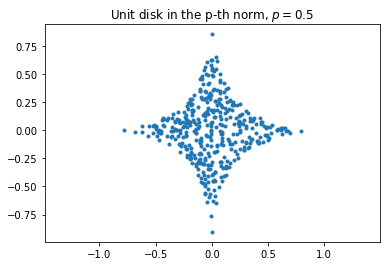

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
p = 0.5 # Which norm do we use
M = 4000 # Number of sampling points
b = []
for i in range(M):
    a = jax.random.normal(jax.random.PRNGKey(i), (1, 2))
    if jnp.linalg.norm(a[i, :], p) <= 1:
        b.append(a[i, :])
b = jnp.array(b)
plt.plot(b[:, 0], b[:, 1], '.')
plt.axis('equal')
plt.title('Unit disk in the p-th norm, $p={0:}$'.format(p))

### Почему важна $L_1$ норма?

$L_1$ норма, как было недавно доказано, играет большую роль в задаче **[compressed sensing](https://ru.wikipedia.org/wiki/Compressive_sensing)**. 

Сформулируем задачу:

- Имеется набор наблюдений $f$ 
- Также имеется линейная модель $Ax = f$, где $A$ это матрица $n \times m$ , и $A$ **известна**
- Кол-во уравнений, $n$, меньше чем кол-во неизвестных, $m$

ВОПРОС: как найти решение?

Решение очевидно неединственное, поэтому естественный подход - найти решение, минимильное относительно какой-то метрики/функционала:

\begin{align*}
& \Vert x \Vert \rightarrow \min_x \\
\mbox{subject to } & Ax = f
\end{align*}

- Выбор $\Vert x \Vert = \Vert x \Vert_2$ приводит к **методу наименьших квадратов (всем известный МНК, linear least squares problem)** .  

- Выбор $\Vert x \Vert = \Vert x \Vert_1$ приводик к [**compressed sensing**](https://en.wikipedia.org/wiki/Compressed_sensing)

### Что такое стабильный алгоритм?

И завершаем раздел понятием **стабильности**.

- Пусть $ x $ будет объектом (например, вектором)
- Пусть $ f (x) $ будет функцией (функционалом), которую вы хотите оценить/найти.

У вас также есть **числовой алгоритм** alg (x), который фактически вычисляет **приближение** к $ f (x) $.

Алгоритм называется **forward stable**, если $$\Vert alg(x) - f(x) \Vert  \leq \varepsilon $$  

Алгоритм называется **backward stable**, если для любого $ x $ существует близкий вектор $x + \delta x$ такой, что

$$alg(x) = f(x + \delta x)$$

и $\Vert \delta x \Vert$ мало.

### Пример

Классическим примером является **решение линейных систем уравнений** с использованием метода Гаусса, которое аналогично LU-факторизации (подробнее позже)

Рассмотрим **матрицу Гильберта** с элементами

$$A = \{a_{ij}\}, \quad a_{ij} = \frac{1}{i + j + 1}, \quad i,j = 0, \ldots, n-1.$$

И рассмотрим линейную систему

$$Ax = f.$$

0.00046270122


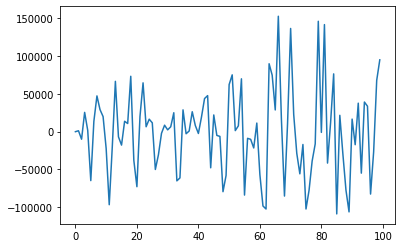

In [ ]:
import numpy as np
n = 100
a = [[1.0/(i + j + 1) for i in range(n)] for j in range(n)] # Hilbert matrix
A = jnp.array(a)
#rhs =  jax.random.normal(jax.random.PRNGKey(0), (n,))
rhs = jnp.ones(n)
sol = jnp.linalg.solve(A, rhs)
print(jnp.linalg.norm(A @ sol - rhs)/jnp.linalg.norm(rhs))
plt.plot(sol)

In [ ]:
rhs = jnp.ones(n)
sol = jnp.linalg.solve(A, rhs)
print(jnp.linalg.norm(A @ sol - rhs)/jnp.linalg.norm(rhs))

0.00046270122


## Применение норм

Пока мы не хотим забегать слишком далеко вперед,
мы уже можем рассмотреть некоторую интуицию относительно того, почему эти понятия полезны. В глубоком обученим мы часто пытаемся решить оптимизационные задачи:

* максимизировать вероятность, присвоенную наблюдаемым данным;
* минимизировать расстояние между предсказаниями

а в основе - верные наблюдения (ответы, y).

Назначение векторных представлений элементам (например, словам, продуктам или новостным статьям) таким образом, чтобы расстояние между похожими предметами было сведено к минимуму, и расстояние между непохожими предметами максимизировалось.
Зачастую цели, возможно, самые важные составляющие алгоритмов глубокого обучения (помимо данных), выражаются как нормы.

## Косинусальная мера

В контекстах ML, где угол используется для измерения близости двух векторов, практикующие специалисты используют термин косинусное сходство для определения схожести

![img](https://github.com/ddvika/Data-Science-School-2020/blob/main/lecture_7/imgs/cosine.png?raw=true)

$$
\cos \theta=\frac{\vec{a} \cdot \vec{b}}{\|\vec{a}\|\|\vec{b}\|}=\frac{\sum_{1}^{n} a_{i} b_{i}}{\sqrt{\sum_{1}^{n} a_{i}^{2}} \sqrt{\sum_{1}^{n} b_{i}^{2}}}
$$
Косинус принимает максимальное значение 1, когда два вектора указывают в одном и том же направлении, минимальное значение -1, когда они указывают в противоположных направлениях, и значение 0, когда два вектора ортогональны. Обратите внимание, что если компоненты векторов большой размерности выбираются случайным образом со средним значением 0, их косинус почти всегда будет близок к 0.

Пример нахождения косинусной меры для определения схожести слов:

![img](https://github.com/ddvika/Data-Science-School-2020/blob/main/lecture_7/imgs/soft-cosine.png?raw=true)
